In [40]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [41]:
# Load the Boston Housing dataset

# boston = datasets.load_boston()
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y  # 'MEDV' is the median value of owner-occupied homes in $1000s

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], test_size=0.2, random_state=42)

# Display the first few rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [42]:
# Add a bias term (column of 1s) for closed-form solution
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Convert X_train and y_train to NumPy arrays with dtype np.float64
X_train_np = np.array(X_train_b, dtype=np.float64)
y_train_np = np.array(y_train, dtype=np.float64).reshape(-1, 1)


# Convert X_test to float for prediction
X_test_np = np.array(X_test_b, dtype=np.float64)

In [43]:
def closed_form_solution(X, y):
  w = np.linalg.inv(X.T @ X) @ X.T @ y
  return w;

In [44]:
def predict(X, w):
  return X @ w

In [45]:
# Closed-form solution: w = (X^T X)^-1 X^T y
w = closed_form_solution(X_train_np, y_train_np)

y_pred = X_test_np @ w

In [46]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Closed-Form Solution MSE: {mse:.4f}")

Closed-Form Solution MSE: 24.2911


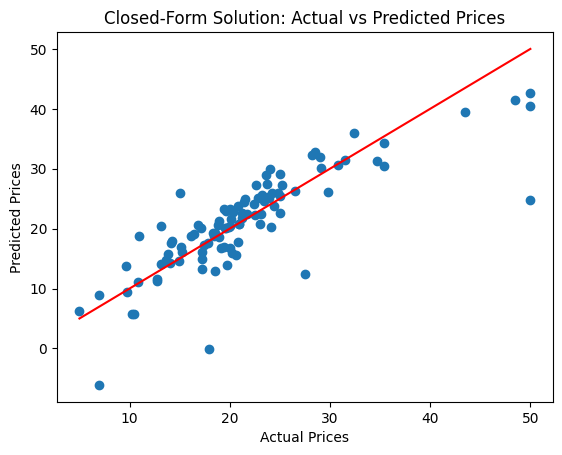

In [47]:
# Plotting
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Closed-Form Solution: Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()